<a href="https://colab.research.google.com/github/ram-shankar58/Anamoly-detector/blob/main/implementations/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
1/1 [==============================] - 1s 619ms/step - loss: 0.5007
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4908
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4811
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4714
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4619
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4524
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4430
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4338
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4246
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4155
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4066
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3979
Epoch 13/100
1/1 [==============================] - 0s 5

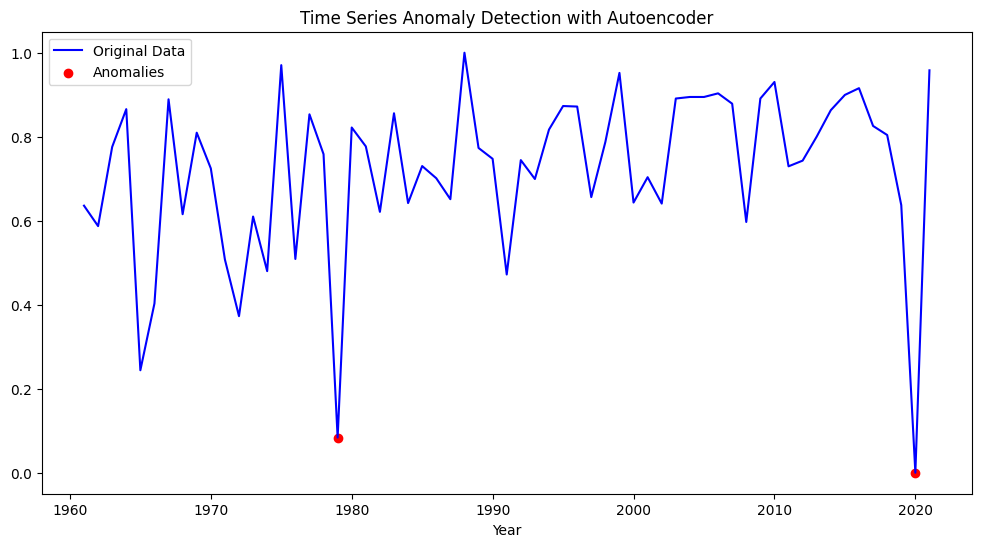

Detected anomalies: [2020 1979]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and preprocess the data
data = pd.read_csv("/content/India_GDP_Data.csv")  # Replace with your data file
years = data['Year'].values
data = data['Percentage_Growth '].values
data = data.reshape(-1, 1)  # Reshape to a 2D array

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define the Autoencoder model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(1,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation=None))  # Linear activation for reconstruction

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the entire data
model.fit(data, data, epochs=100, batch_size=64)

# Make predictions on the entire data
predictions = model.predict(data)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(data - predictions), axis=1)

# Define a threshold for anomaly detection (symmetric around zero)
threshold = 0.09  # Adjust as needed

# Detect anomalies
anomalies = np.where(np.abs(reconstruction_errors) > threshold)[0]

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(years, data, label='Original Data', color='blue')
plt.scatter(years[anomalies], data[anomalies], color='red', label='Anomalies')
plt.legend()
plt.title('Time Series Anomaly Detection with Autoencoder')
plt.xlabel('Year')
plt.show()

# Print the detected anomalies
print("Detected anomalies:", years[anomalies])
